In [71]:
import pandas as pd
df=pd.read_csv(r"C:\Users\simar\Downloads\loan_approval_dataset.csv").iloc[:,1:]
df
#goal----->to predict loan approval status
#feature engineering
#stastical analysis

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [72]:
print(df.isna().sum())
# check for missing value(nan or null)values,sum method counts number of true value in each column

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [74]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [75]:
#clean up the column names of df by removing any space present in them

In [76]:
df.columns=df.columns.str.replace(' ' , '') #replace all double spaces with single spaces in the column names 

In [77]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [78]:
#loan status
print(df["loan_status"].value_counts()) #number of times each unique value appears in a column

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [79]:
#we will apply label encoding on it

In [80]:
#bank asset value
print(df["bank_asset_value"].value_counts())

bank_asset_value
1400000     63
4900000     63
3600000     63
4500000     61
1600000     60
            ..
14600000     2
14200000     2
14400000     1
14300000     1
13700000     1
Name: count, Length: 146, dtype: int64


In [81]:
#luxury_assets_value
print(df["luxury_assets_value"].value_counts())

luxury_assets_value
6200000     26
2900000     26
20400000    26
12300000    24
12000000    24
            ..
39100000     1
37700000     1
39200000     1
34300000     1
36700000     1
Name: count, Length: 379, dtype: int64


In [82]:
#commercial_assets_value
print(df["commercial_assets_value"].value_counts())

commercial_assets_value
0           107
200000      101
100000      100
300000       90
500000       83
           ... 
19400000      1
18300000      1
17400000      1
15700000      1
18900000      1
Name: count, Length: 188, dtype: int64


In [83]:
#residential_assets_value
print(df["residential_assets_value"].value_counts())

residential_assets_value
400000      66
500000      63
100000      60
1000000     57
600000      56
            ..
25700000     1
20300000     1
28300000     1
26800000     1
27300000     1
Name: count, Length: 278, dtype: int64


In [84]:
#cibil_score
print(df["cibil_score"].value_counts())

cibil_score
348    16
543    15
538    15
778    14
509    14
       ..
334     2
773     2
893     2
484     2
864     1
Name: count, Length: 601, dtype: int64


In [85]:
#loan_term---->duration for which a loan is granted and is expected to be repaid
print(df["loan_term"].value_counts())

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64


In [86]:
#loan_amount
print(df["loan_amount"].value_counts())

loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: count, Length: 378, dtype: int64


In [87]:
#income_annum
print(df["income_annum"].value_counts())

income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64


In [88]:
#self_employed
print(df["self_employed"].value_counts())

self_employed
Yes    2150
No     2119
Name: count, dtype: int64


In [89]:
# we will apply label encoding on it

In [90]:
#education
print(df["education"].value_counts())

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64


In [91]:
# we will apply label encoding on it

In [92]:
#no_of_dependents----->refers to the total number of people who rely financially on the loan applicant such as children,
#spouse,elderly family members or other
print(df["no_of_dependents"].value_counts())

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64


In [93]:
#Data visualization

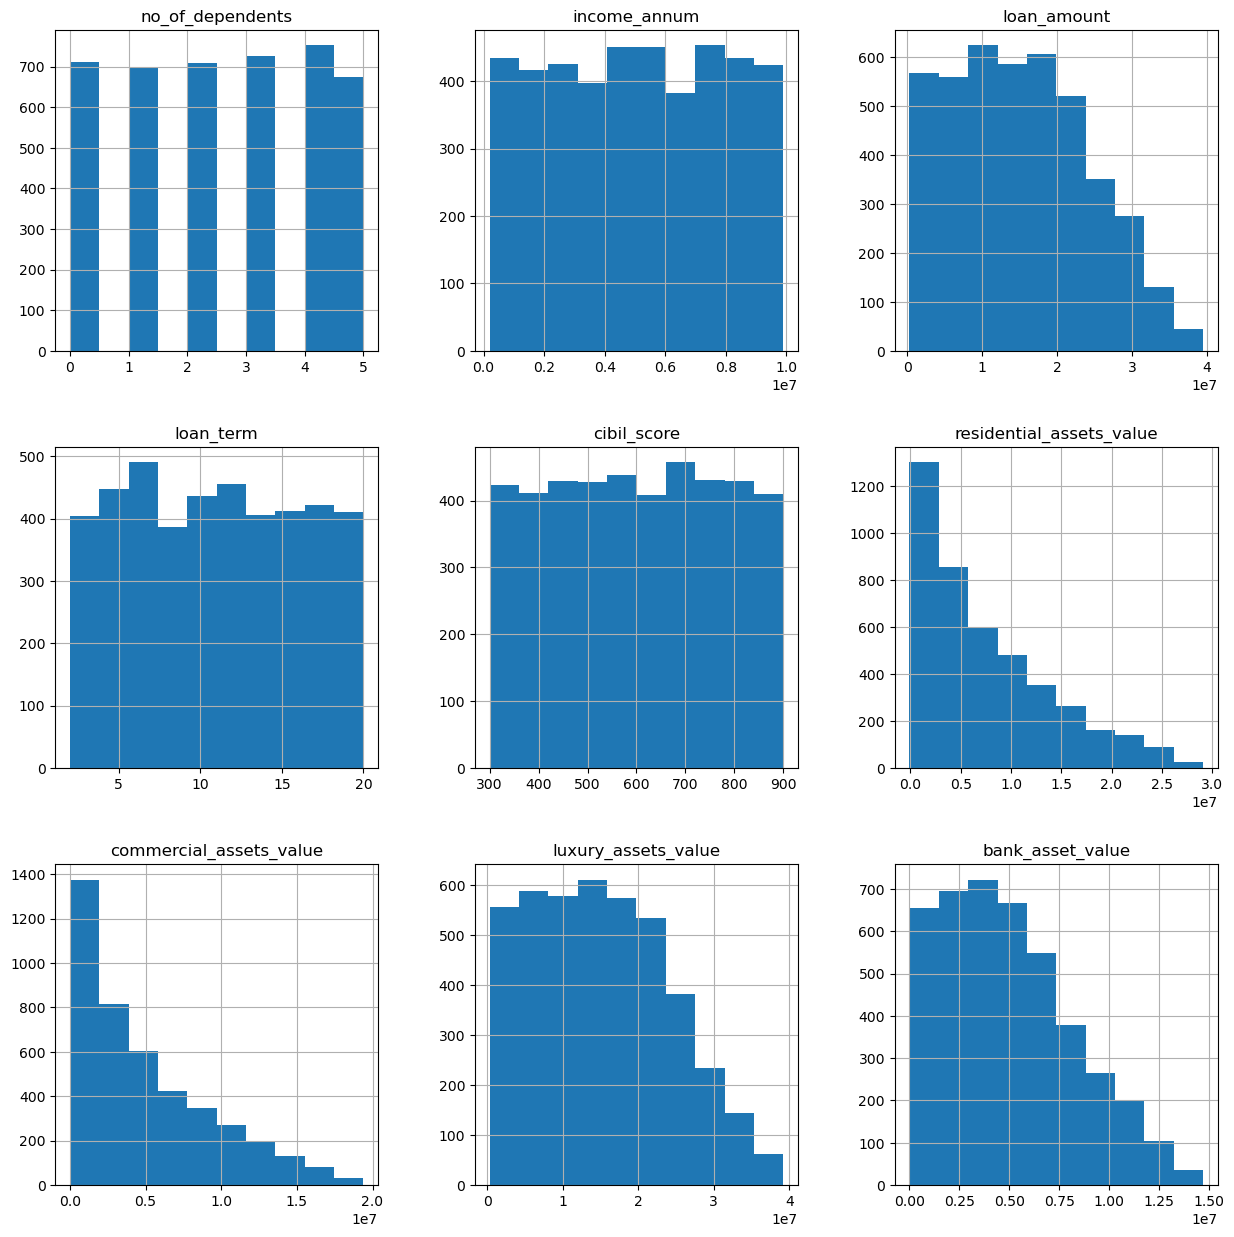

In [94]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,15))
plt.show()

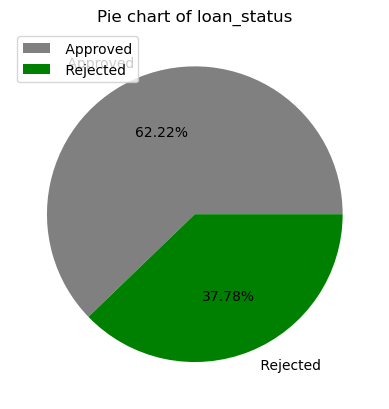

In [95]:
import matplotlib.pyplot as plt
plt.pie(df["loan_status"].value_counts(),labels=df["loan_status"].value_counts().index,colors=["grey","g"],autopct="%1.2f%%")
plt.legend(df["loan_status"].unique())
plt.title("Pie chart of loan_status")
plt.show()


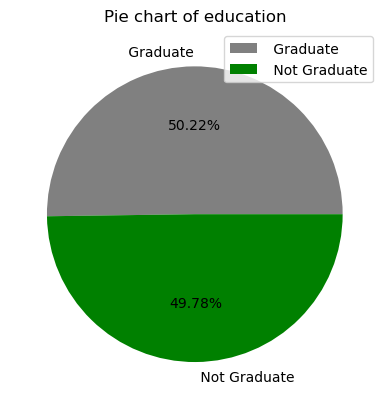

In [96]:
plt.pie(df["education"].value_counts(),labels=df["education"].value_counts().index,colors=["grey","g"],autopct="%1.2f%%")
plt.legend(df["education"].unique())
plt.title("Pie chart of education")
plt.show()

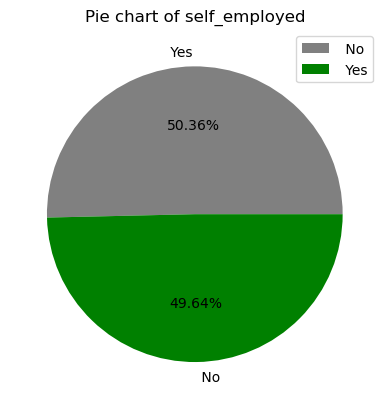

In [97]:
plt.pie(df["self_employed"].value_counts(),labels=df["self_employed"].value_counts().index,colors=["grey","g"],autopct="%1.2f%%")
plt.legend(df["self_employed"].unique())
plt.title("Pie chart of self_employed")
plt.show()

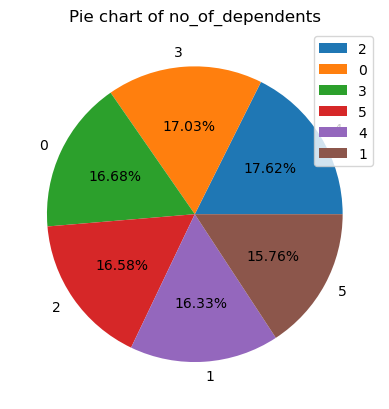

In [98]:
plt.pie(df["no_of_dependents"].value_counts(),labels=df["no_of_dependents"].value_counts().index,autopct="%1.2f%%")
plt.legend(df["no_of_dependents"].unique())
plt.title("Pie chart of no_of_dependents")
plt.show()

In [99]:
#Encoding

In [100]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()        #create an object of label encoder
df["education"]=l.fit_transform(df["education"])

In [101]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()        #create an object of label encoder
df["self_employed"]=l.fit_transform(df["self_employed"])

In [102]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()        #create an object of label encoder
df["loan_status"]=l.fit_transform(df["loan_status"])

In [103]:
df.dtypes

no_of_dependents            int64
education                   int32
self_employed               int32
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int32
dtype: object

In [104]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [105]:
#kernel density estimation---->kde plot the graph---->probability density distribution--->mass/volume-->formula
#skewness is a measure of the asymmetry of a probability distribution, how much distribution deviate from normal distribution 
#bell shape curved
#+ve---->tail of the distribution is longer on right side
#-ve--->on left side

<Axes: ylabel='Density'>

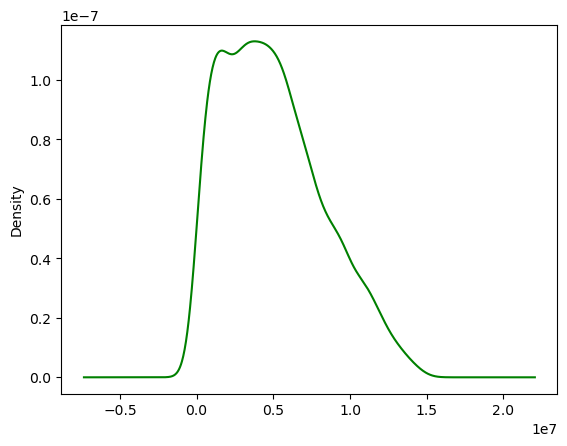

In [106]:
df["bank_asset_value"].plot(kind="kde",color="g")

In [107]:
df["bank_asset_value"].skew()

0.5607250089736816

<Axes: ylabel='Density'>

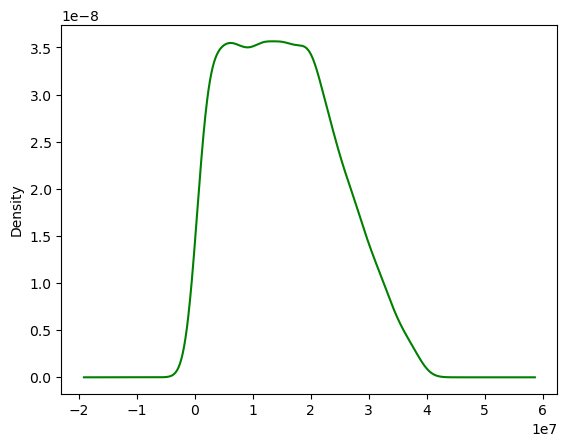

In [108]:
df["luxury_assets_value"].plot(kind="kde",color="g")  #xaxis luxury assets value
#yaxis shows the probability density of observing those value
#high density between 0 to 2

In [109]:
df["luxury_assets_value"].skew()#both reveals that the distribution of luxury asset is right skewed,majority individuals have lower value of
#luxury asset,a smaller portion owns more luxury asset
#+ve skewness indicates that the tail of the distribution extends more to the right

0.3222075028955774

<Axes: ylabel='Density'>

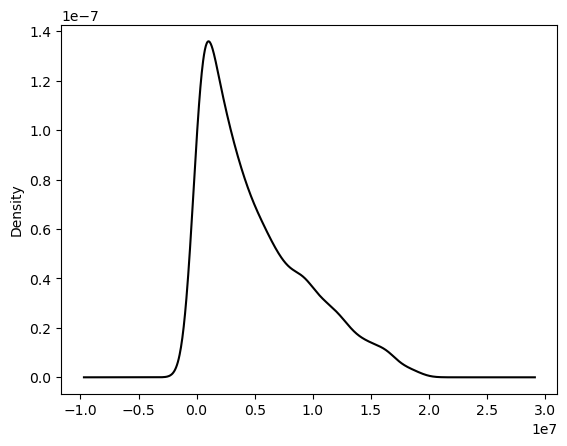

In [110]:
df["commercial_assets_value"].plot(kind="kde",color="k")

In [111]:
df["commercial_assets_value"].skew() #right skewed distribution,more datapoint cluster towards the lower end of the value range
#longer tail indicate higher value--->number of individual have low values for commercial assets
#+ve skewness indicates that the tail of the distribution extends more to the right

0.9577908874986114

<Axes: ylabel='Density'>

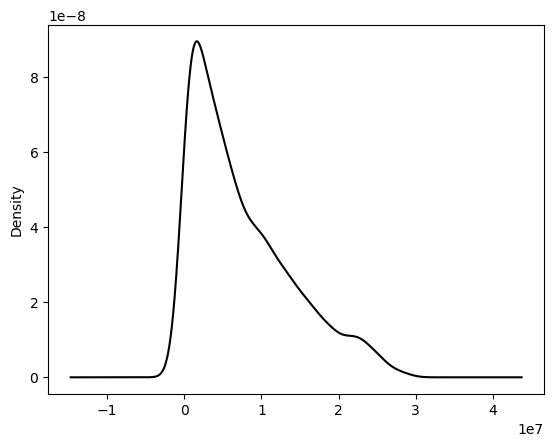

In [112]:
df["residential_assets_value"].plot(kind="kde",color="k")

In [113]:
df["residential_assets_value"].skew()#right skewed distribution,majority of the datapoints towards the lower end of the value range
#tail indicate higher values--->indicates that larger portion of individual have low value of residential assets
#+ve skewness indicates that the tail of the distribution extends more to the right

0.9784505965115631

<Axes: ylabel='Density'>

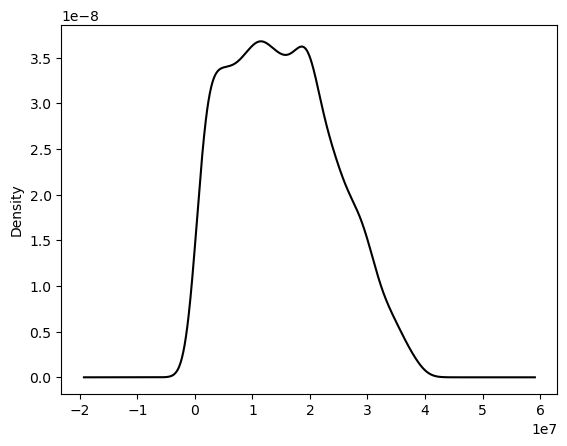

In [114]:
df["loan_amount"].plot(kind="kde",color="k")

In [115]:
df["loan_amount"].skew()#right skewed distribution,larger number of data point cluster towards the lower end of the value range
#long tail extends highr value-->indicates that number of individual have low loan amounts
#+ve skewness indicates that the tail of the distribution extends more to the right

0.30872388482299223

<Axes: ylabel='Density'>

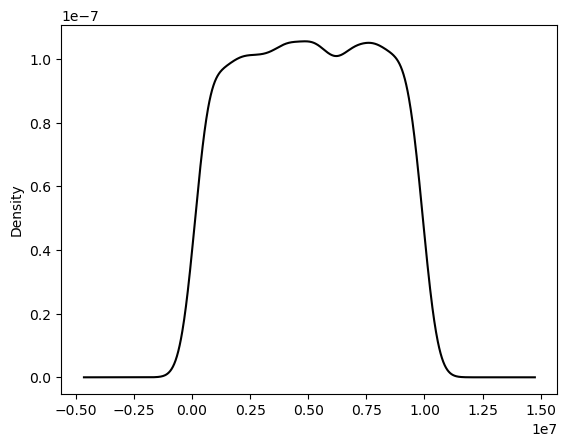

In [116]:
df["income_annum"].plot(kind="kde",color="k")

In [117]:
df["income_annum"].skew()#right skewed distribution,larger number of data point cluster towards the lower end of the value range
#long tail extends highr value-->indicates that number of individual have low annual income
#+ve skewness indicates that the tail of the distribution extends more to the right

-0.012814425096650109

In [118]:
##pearson correlation test(independent and dependent in numerical form)
c=df.corr()
c

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246
luxury_assets_value,0.002817,-0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.015465


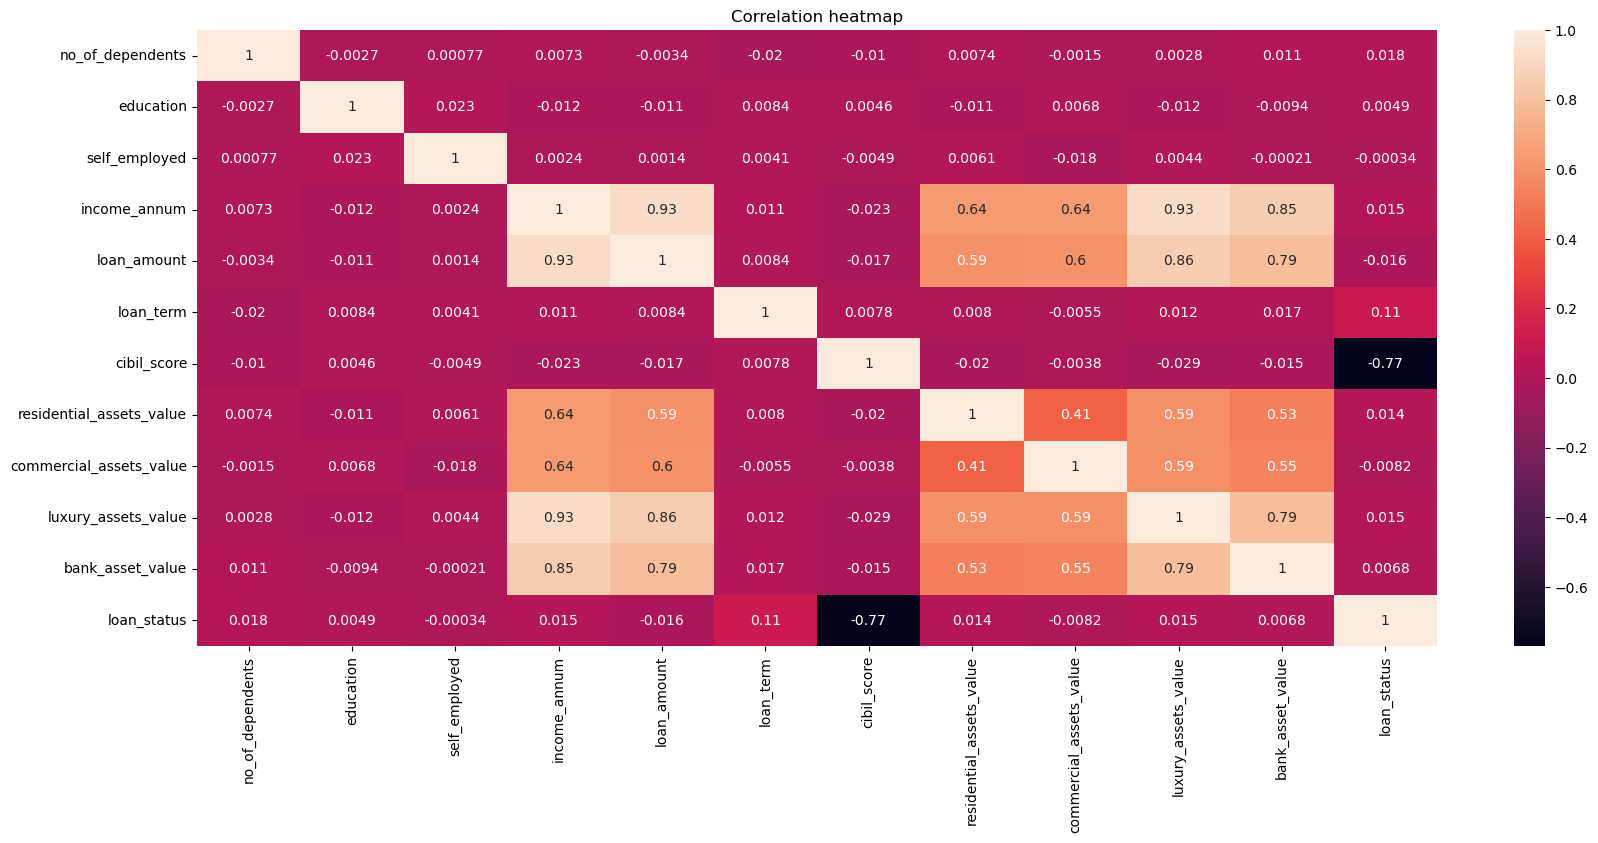

In [119]:
#pearson correlation test(independent and dependent in numetrical form)
import seaborn as sns
plt.figure(figsize=(20,8))
sns.heatmap(c,annot=True)
plt.title('Correlation heatmap')
plt.show()
#0 indicate no correltion
#1 perfect correlation
#- -ve correlation
#0.2  moderate correlation

In [120]:
x=df[["no_of_dependents","education","self_employed","income_annum","loan_amount","loan_term","cibil_score","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"]]
y=df[["loan_status"]]

In [121]:
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [122]:
y

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
4264,1
4265,0
4266,1
4267,0


In [123]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [124]:
from sklearn.preprocessing import StandardScaler #to scale numerical feature
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [126]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\simar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [128]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


C:\Users\simar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [129]:
from sklearn.svm import SVC
classifier=SVC(C=0.9)     
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\simar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

C:\Users\simar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [131]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

0.1053864168618267


In [132]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.1053864168618267


In [133]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[489  39]
 [ 51 275]]
0.8757961783439491
0.843558282208589
0.859375
0.8946135831381733


In [134]:
x_test

array([[ 1.47506715,  1.00446064,  0.99276452, ...,  0.27956206,
        -0.54119248,  0.25334064],
       [ 1.47506715,  1.00446064,  0.99276452, ...,  1.5100643 ,
         1.23850174,  1.69958143],
       [ 0.8853442 ,  1.00446064, -1.00728821, ..., -1.06487556,
         1.1176583 ,  1.48418386],
       ...,
       [ 0.8853442 ,  1.00446064,  0.99276452, ..., -0.26732782,
        -0.47527788, -0.57747854],
       [-0.2941017 , -0.99555917, -1.00728821, ..., -0.51798568,
        -1.16738118, -0.97750259],
       [ 0.29562125, -0.99555917, -1.00728821, ...,  0.8720261 ,
         1.414274  ,  1.05338873]])

In [135]:
y_test

,loan_status
790,0
188,0
2761,0
2857,0
2403,1
...,...
618,0
2610,0
3176,1
2917,0


In [136]:
print(y_train.value_counts())

loan_status
0              2128
1              1287
Name: count, dtype: int64


In [137]:
#prediction----->loan status approval----->0 approved,------->1 rejected

In [140]:
input_data=[[3,	0	,0	,9100000	,29700000,	20,	506	,7100000	,4500000,	33300000	,12800000]] #array form
prediction=classifier.predict(input_data)
print("loan status approval:",prediction)

loan status approval: [0]


In [141]:
#prediction=classifier.predict(x_test)
#prediction